<a href="https://colab.research.google.com/github/MuskanAgarwal430/ann1/blob/main/ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu==2.8

In [2]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
##divide the dataset into dep and indep features with only beneficial features
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [6]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [8]:
geographyy=pd.get_dummies(X['Geography'], drop_first=True, dtype=int)
geographyy

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [9]:
genderr=pd.get_dummies(X['Gender'],drop_first=True, dtype=int)

In [10]:
##concat
X=X.drop(['Geography','Gender'],axis=1)

In [11]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [12]:
X=pd.concat([X,geographyy,genderr],axis=1)


In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [14]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [15]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [16]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [17]:
X_train.shape

(8000, 11)

In [18]:
## create ANN
from tensorflow.keras.models import Sequential ##
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [19]:
#initialize ANN
classifier=Sequential()

In [20]:
## adding input layer
classifier.add(Dense(units=11,activation='relu'))
#layers add krni h using dense, ip=11 cols, activ gets applied from next layer

In [21]:
##adding first hidden layer
classifier.add(Dense(units=7,activation='relu'))
#there is technique to find how much hidden layer need to create.
#dense has many fns

In [22]:
classifier.add(Dense(units=6,activation='relu'))

In [23]:
#adding output layer
classifier.add(Dense(units=1,activation='sigmoid')) #1 neuron

In [26]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
#The compile method in Keras is used to configure the model for training.
#It tells Keras how to update the model parameters based on the data it sees and how to measure the model's performance.
#bydefault adam uses learning rate=0.1.
#you can use other optimizer too but this one is best.
#instead of opt can be 'adam'

In [25]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [27]:
#early stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,

)

In [28]:
#now trraining
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 2s 2ms/step - loss: 0.4374 - accuracy: 0.8151 - val_loss: 0.4080 - val_accuracy: 0.8243
Epoch 2/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3735 - accuracy: 0.8459 - val_loss: 0.3734 - val_accuracy: 0.8387
Epoch 3/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3549 - accuracy: 0.8541 - val_loss: 0.3700 - val_accuracy: 0.8463
Epoch 4/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3507 - accuracy: 0.8517 - val_loss: 0.3681 - val_accuracy: 0.8466
Epoch 5/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3443 - accuracy: 0.8591 - val_loss: 0.3670 - val_accuracy: 0.8482
Epoch 6/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3441 - accuracy: 0.8569 - val_loss: 0.3653 - val_accuracy: 0.8489
Epoch 7/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3433 - accuracy: 0.8582 - val_loss: 0.3741 - val_accuracy:

In [29]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

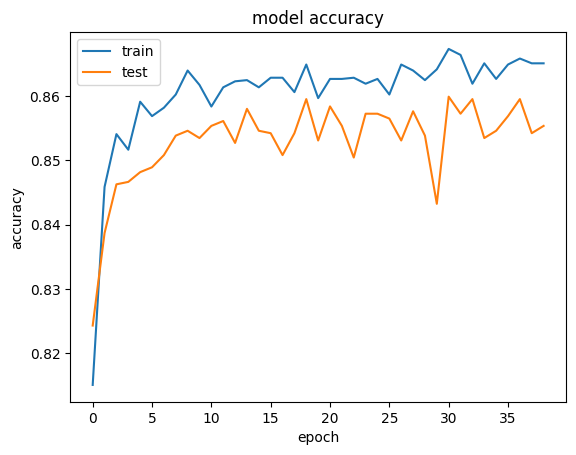

In [30]:
#summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

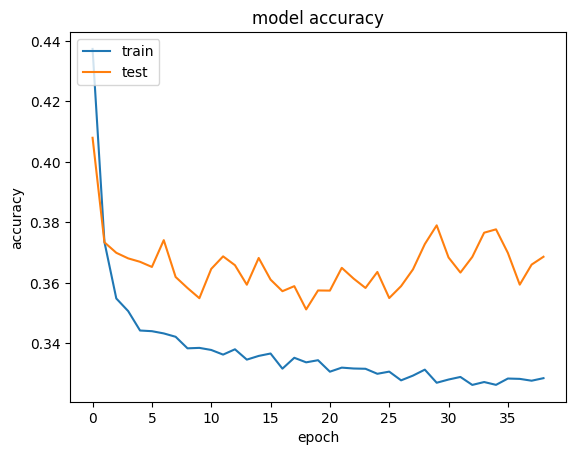

In [31]:
#summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [33]:
#making predictions and evaluating the model
y_pred=classifier(X_test)
y_pred=(y_pred>=0.5) #>0.5=1 in sigmoid

In [34]:
#make confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1500,   95],
       [ 191,  214]])

In [35]:
#calculate accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [36]:
score

0.857

In [37]:
#get the weights
classifier.get_weights()

[array([[-6.4326626e-01,  1.4235918e-02,  1.0463121e-01, -4.0215945e-01,
          4.7324267e-01, -2.2454156e-01, -6.6978025e-01, -3.6047897e-01,
         -3.1056359e-01,  4.2967373e-01,  1.6818976e-02],
        [-2.0724797e+00, -2.7958724e+00, -1.9832004e+00,  9.3467242e-01,
          7.7566528e-01, -6.0592043e-01,  8.1676030e-01,  1.3797449e+00,
          2.8981714e+00, -8.9964038e-01, -1.6855837e+00],
        [-2.4234297e-02, -2.2274677e-01,  7.5786400e-01, -5.6185460e-01,
         -4.7711441e-01, -1.5952474e+00,  3.1411014e-02,  4.8150885e-01,
          5.8373642e-01,  1.1231729e+00,  4.4255890e-02],
        [-1.6607177e-01, -3.1184155e-01, -1.6420999e+00,  1.6445208e+00,
         -2.5468063e+00, -1.3491942e+00, -1.0253179e+00, -9.3106049e-01,
          2.2770640e-01, -1.2020807e+00,  5.1677930e-01],
        [-6.3867658e-01,  2.5532565e-01, -3.6550370e-01,  3.0160198e+00,
         -1.0968980e-01, -1.7414294e+00, -4.4257550e+00, -8.2382917e-01,
         -6.0917681e-01,  3.4094467e+0

In [ ]:
#can use dropout after every dense
#classifier.add(Dense(0.2))